In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


In [6]:
base = pd.read_csv("insurance.csv")
base = base.dropna()
base

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,6,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,Moderate,SportsCar,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,7,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Mild,Economy,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,8,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19979,19980,True,Adolescent,Middle,Adventurous,Older,Severe,Tank,Severe,FamilySedan,...,City,False,HundredThou,HundredThou,True,Thousand,Excellent,False,Thousand,Many
19981,19982,False,Adult,Middle,Normal,Older,Moderate,Football,Moderate,FamilySedan,...,Secure,True,TenThou,Thousand,False,Thousand,Good,False,Thousand,Many
19983,19984,False,Adult,Prole,Adventurous,Current,Mild,Football,Mild,Economy,...,Rural,False,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
19994,19995,False,Adult,UpperMiddle,Normal,Older,Moderate,Football,Mild,FamilySedan,...,Secure,True,TenThou,Thousand,False,Thousand,Good,False,Thousand,Many


In [7]:
base = base.drop(columns="Unnamed: 0")
base


,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
5,False,Adult,UpperMiddle,Normal,Current,Moderate,EggShell,Moderate,SportsCar,Poor,...,Suburb,True,HundredThou,HundredThou,True,TenThou,Poor,True,Thousand,Many
6,False,Senior,UpperMiddle,Normal,Current,Mild,Football,Mild,Economy,Poor,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
7,False,Adult,Prole,Normal,Older,Severe,EggShell,Severe,Economy,Poor,...,City,False,Million,HundredThou,True,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19979,True,Adolescent,Middle,Adventurous,Older,Severe,Tank,Severe,FamilySedan,Poor,...,City,False,HundredThou,HundredThou,True,Thousand,Excellent,False,Thousand,Many
19981,False,Adult,Middle,Normal,Older,Moderate,Football,Moderate,FamilySedan,Poor,...,Secure,True,TenThou,Thousand,False,Thousand,Good,False,Thousand,Many
19983,False,Adult,Prole,Adventurous,Current,Mild,Football,Mild,Economy,Poor,...,Rural,False,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Many
19994,False,Adult,UpperMiddle,Normal,Older,Moderate,Football,Mild,FamilySedan,Poor,...,Secure,True,TenThou,Thousand,False,Thousand,Good,False,Thousand,Many


In [8]:
base.shape

(5319, 27)

In [9]:
# coluna accident
y = base.iloc[:, 7].values
X = base.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values


In [10]:
y

array(['Mild', 'Moderate', 'Moderate', ..., 'Mild', 'Mild', 'Mild'],
      dtype=object)

In [11]:
labelencoder = LabelEncoder()

In [12]:
# percorre o numero de colunas de X
for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = labelencoder.fit_transform(X[:,i])


In [13]:
X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 0, 1, ..., 0, 3, 0],
       [0, 1, 2, ..., 1, 3, 0],
       ...,
       [0, 1, 1, ..., 1, 3, 0],
       [0, 1, 2, ..., 0, 3, 0],
       [0, 1, 1, ..., 0, 3, 0]], dtype=object)

In [14]:
# dividir a base em treino e teste (train test split)
# X variaveis independentes
# y variavel dependente
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)


GaussianNB()

In [16]:
previsoes = modelo.predict(X_teste)

In [17]:
previsoes

array(['Moderate', 'Moderate', 'Mild', ..., 'Severe', 'Moderate',
       'Moderate'], dtype='<U8')

In [18]:
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted') 
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Acuracia: {accuracy}, Precisao: {precision}, Recall: {recall}, F1: {f1}') 

Acuracia: 0.5507518796992481, Precisao: 0.7895298876518713, Recall: 0.5507518796992481, F1: 0.4612364968688107


In [19]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

        Mild       0.95      0.87      0.91       423
    Moderate       0.41      0.96      0.57       497
      Severe       0.97      0.05      0.10       676

    accuracy                           0.55      1596
   macro avg       0.78      0.63      0.53      1596
weighted avg       0.79      0.55      0.46      1596



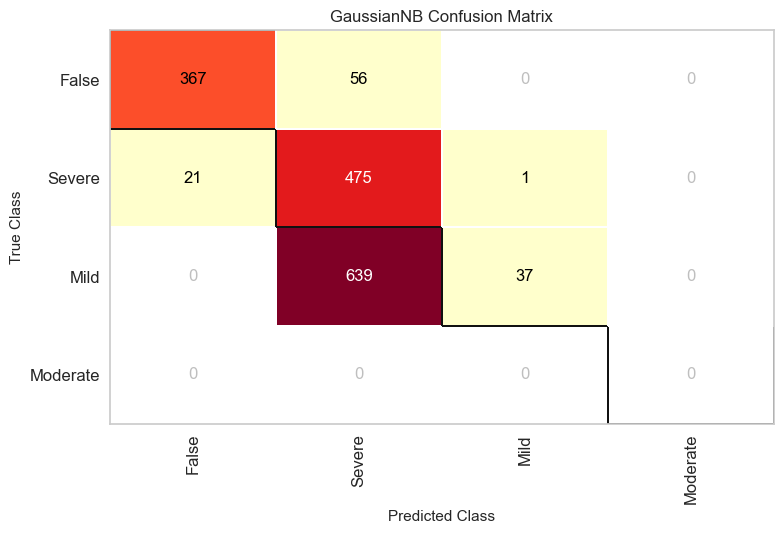

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [20]:
confusao = ConfusionMatrix(modelo, classes=['False','Severe','Mild','Moderate'])
confusao.fit(X_treinamento, y_treinamento)
confusao.score(X_teste, y_teste)
confusao.poof()